In [39]:
# ===============================================
# 0. Importación de Librerías
# ===============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño base para los gráficos

# **1.ETL  Extracción, Transformación y Carga**


A. Extracción (Importar y Consolidar Datos)

In [40]:
# ===============================================
#       Extracción: Carga y Concatenación
# ===============================================

# Lista de nombres de archivos
file_names = [
    'car_sales_data - 1.csv',
    'car_sales_data - 2.csv',
    'car_sales_data - 3.csv',
    'car_sales_data - 4.csv'
]

# Leer y almacenar cada DataFrame
dataframes = [pd.read_csv(f) for f in file_names]

# Concatenar todos los DataFrames en uno solo
df_raw = pd.concat(dataframes, ignore_index=True)

print(f"✅ Extracción completada. Filas totales: {len(df_raw)}")
print("\nPrimeras 5 filas del dataset combinado:")
print(df_raw.head())
print("-" * 50)

✅ Extracción completada. Filas totales: 2500000

Primeras 5 filas del dataset combinado:
         Date      Salesperson   Customer Name Car Make  Car Model  Car Year  \
0  2022-08-01  Monica Moore MD     Mary Butler   Nissan     Altima      2018   
1  2023-03-15     Roberto Rose  Richard Pierce   Nissan      F-150      2016   
2  2023-04-29     Ashley Ramos    Sandra Moore     Ford      Civic      2016   
3  2022-09-04   Patrick Harris    Johnny Scott     Ford     Altima      2013   
4  2022-06-16       Eric Lopez   Vanessa Jones    Honda  Silverado      2022   

   Sale Price  Commission Rate  Commission Earned  
0       15983         0.070495            1126.73  
1       38474         0.134439            5172.40  
2       33340         0.114536            3818.63  
3       41937         0.092191            3866.20  
4       20256         0.113490            2298.85  
--------------------------------------------------


B. Transformación (Limpieza y Creación de Variables)

In [41]:
# ===============================================
#           Transformación: Limpieza
# ===============================================

# 1. Limpieza de Duplicados
duplicates_before = df_raw.duplicated().sum()
df_cleaned = df_raw.drop_duplicates()
duplicates_after = len(df_raw) - len(df_cleaned)

print(f"➡️ Duplicados encontrados y eliminados: {duplicates_after} filas.")

# 2. Limpieza de Valores Faltantes (Nulos)
print("\nValores nulos por columna antes de la limpieza:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

# Eliminamos las filas con CUALQUIER valor nulo
df_final = df_cleaned.dropna()
nulls_dropped = len(df_cleaned) - len(df_final)

print(f"➡️ Filas con valores nulos eliminadas: {nulls_dropped} filas.")
print(f"✅ DataFrame final listo para análisis. Shape: {df_final.shape}")
print("-" * 50)

➡️ Duplicados encontrados y eliminados: 0 filas.

Valores nulos por columna antes de la limpieza:
Series([], dtype: int64)
➡️ Filas con valores nulos eliminadas: 0 filas.
✅ DataFrame final listo para análisis. Shape: (2500000, 9)
--------------------------------------------------


C. Carga (DataFrame Final)

In [42]:
# =======================================================
#  Transformación: Tipos de Datos y Variables Derivadas
# =======================================================

# 3. Corregir tipos de datos
df_final['Date'] = pd.to_datetime(df_final['Date'])
print("✅ Columna 'Date' convertida a tipo datetime.")

# 4. Generar nuevas variables derivadas
df_final['Sales Year'] = df_final['Date'].dt.year
df_final['Sales Month'] = df_final['Date'].dt.month
df_final['Sales Quarter'] = df_final['Date'].dt.to_period('Q')
df_final['Sales Month Name'] = df_final['Date'].dt.strftime('%Y-%m') # Año y mes para ordenar

print("✅ Variables 'Sales Year', 'Sales Month', 'Sales Quarter' y 'Sales Month Name' creadas.")
print("-" * 50)

# 5. Carga (Documentación)
# 'df_final' para el EDA.
print("✅ Proceso ETL completado.")
print("Resumen de Tipos de Datos del DataFrame Final:")
print(df_final.dtypes)

✅ Columna 'Date' convertida a tipo datetime.
✅ Variables 'Sales Year', 'Sales Month', 'Sales Quarter' y 'Sales Month Name' creadas.
--------------------------------------------------
✅ Proceso ETL completado.
Resumen de Tipos de Datos del DataFrame Final:
Date                 datetime64[ns]
Salesperson                  object
Customer Name                object
Car Make                     object
Car Model                    object
Car Year                      int64
Sale Price                    int64
Commission Rate             float64
Commission Earned           float64
Sales Year                    int32
Sales Month                   int32
Sales Quarter         period[Q-DEC]
Sales Month Name             object
dtype: object


# **2. EDA – Análisis Exploratorio de Datos**

A. Análisis de la Estructura y Distribución

In [43]:
# ===============================================
#      EDA – Análisis Exploratorio de Datos
# ===============================================

print("\n--- 2.A. Análisis de la Estructura (info()) ---")
df_final.info()

print("\n--- 2.B. Análisis Descriptivo de Variables Numéricas (describe()) ---")
# Estadísticas descriptivas de columnas numéricas
print(df_final[['Sale Price', 'Commission Rate', 'Commission Earned', 'Car Year']].describe().round(2))

print("\n--- 2.C. Análisis Descriptivo de Variables Categóricas ---")
# Estadísticas descriptivas de columnas categóricas (object)
print("Distribución de Marcas (Car Make):")
print(df_final['Car Make'].value_counts())
print("\nDistribución de Modelos (Car Model):")
print(df_final['Car Model'].value_counts())


--- 2.A. Análisis de la Estructura (info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Salesperson        object        
 2   Customer Name      object        
 3   Car Make           object        
 4   Car Model          object        
 5   Car Year           int64         
 6   Sale Price         int64         
 7   Commission Rate    float64       
 8   Commission Earned  float64       
 9   Sales Year         int32         
 10  Sales Month        int32         
 11  Sales Quarter      period[Q-DEC] 
 12  Sales Month Name   object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5), period[Q-DEC](1)
memory usage: 228.9+ MB

--- 2.B. Análisis Descriptivo de Variables Numéricas (describe()) ---
       Sale Price  Commission Rate  Commission Earned    Car Year
count

# 3. Preguntas de Negocio


--- Pregunta 1: Top 5 Modelos de Vehículo Más Vendidos (Cantidad) ---

Tabla de Evidencia:
           Cantidad de Ventas
Car Model                    
Silverado              500842
Civic                  500498
Corolla                500162
F-150                  499679
Altima                 498819


/tmp/ipython-input-882876058.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_models.index, y='Cantidad de Ventas', data=top_5_models, palette='viridis')


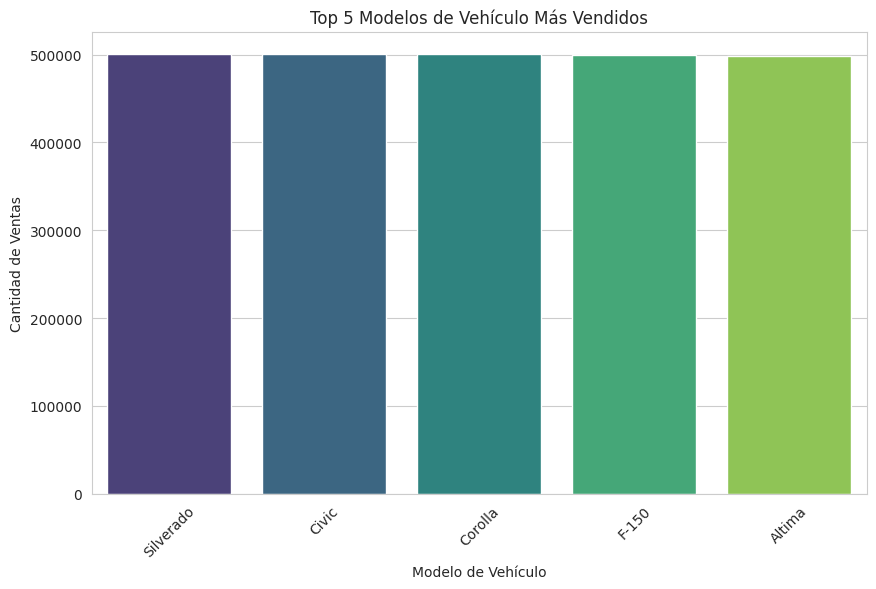


Interpretación:
El modelo de vehículo más popular es Silverado, le sigue el Civic y el Corolla


In [45]:
# ===============================================
#  Pregunta 1: Top 5 Modelos por Cantidad
# ===============================================
print("\n--- Pregunta 1: Top 5 Modelos de Vehículo Más Vendidos (Cantidad) ---")

# Contar la frecuencia de cada modelo
top_5_models = df_final['Car Model'].value_counts().head(5).rename('Cantidad de Ventas').to_frame()

print("\nTabla de Evidencia:")
print(top_5_models)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_models.index, y='Cantidad de Ventas', data=top_5_models, palette='viridis')
plt.title('Top 5 Modelos de Vehículo Más Vendidos')
plt.xlabel('Modelo de Vehículo')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

# Interpretación
print("\nInterpretación:")
print("El modelo de vehículo más popular es Silverado, le sigue el Civic y el Corolla")


--- Pregunta 2: Top 3 Vendedores por Comisiones Totales ---

Tabla de Evidencia:
                 Comisión Total ($)
Salesperson                        
Michael Smith            3658467.56
Michael Johnson          2883629.29
David Smith              2456566.33


/tmp/ipython-input-1127609075.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_3_salespeople.index, x='Comisión Total ($)', data=top_3_salespeople, palette='plasma')


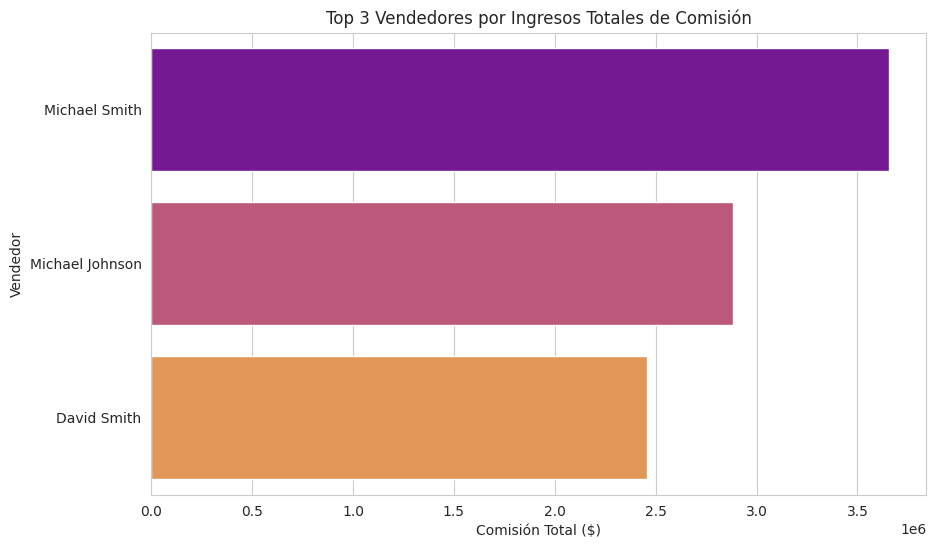


Interpretación:
El vendedor Michael Smith lidera la tabla con una comision total de $3658467.56


In [46]:
# ===============================================
#   Pregunta 2: Top 3 Vendedores por Comisión
# ===============================================
print("\n--- Pregunta 2: Top 3 Vendedores por Comisiones Totales ---")

# Cálculo: Agrupar por 'Salesperson' y sumar 'Commission Earned'
top_3_salespeople = df_final.groupby('Salesperson')['Commission Earned'].sum().nlargest(3).round(2).rename('Comisión Total ($)').to_frame()

print("\nTabla de Evidencia:")
print(top_3_salespeople)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(y=top_3_salespeople.index, x='Comisión Total ($)', data=top_3_salespeople, palette='plasma')
plt.title('Top 3 Vendedores por Ingresos Totales de Comisión')
plt.xlabel('Comisión Total ($)')
plt.ylabel('Vendedor')
plt.show()

# Interpretación
print("\nInterpretación:")
print("El vendedor Michael Smith lidera la tabla con una comision total de $3658467.56")


--- Pregunta 3: Top 5 Marcas de Coches Más Vendidas (Cantidad) ---

Tabla de Evidencia:
           Cantidad de Ventas
Car Make                     
Honda                  500687
Chevrolet              500455
Toyota                 500147
Ford                   499781
Nissan                 498930


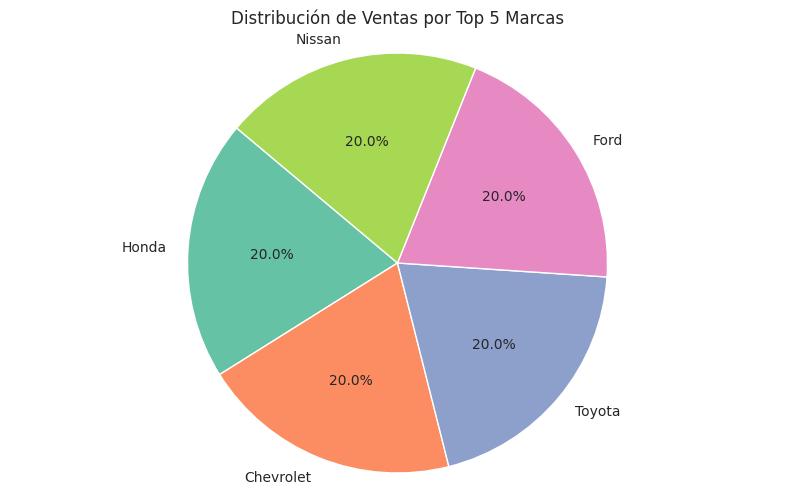


Interpretación:
Las 5 principales marcas son lideras en ventas por Honda, Chevrolet y Toyota


In [47]:
# ===============================================
#    Pregunta 3: Top 5 Marcas por Cantidad
# ===============================================
print("\n--- Pregunta 3: Top 5 Marcas de Coches Más Vendidas (Cantidad) ---")

# Contar la frecuencia de cada marca
top_5_makes = df_final['Car Make'].value_counts().head(5).rename('Cantidad de Ventas').to_frame()

print("\nTabla de Evidencia:")
print(top_5_makes)

# Visualización
plt.figure(figsize=(10, 6))
plt.pie(top_5_makes['Cantidad de Ventas'], labels=top_5_makes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribución de Ventas por Top 5 Marcas')
plt.axis('equal')
plt.show()

# Interpretación
print("\nInterpretación:")
print("Las 5 principales marcas son lideras en ventas por Honda, Chevrolet y Toyota")

In [48]:
# =================================================================
#    Pregunta 4: Comisión MÁXIMA y MÍNIMA por Transacción?
# =================================================================
print("\n--- Pregunta: Comisión MÁXIMA y MÍNIMA por Transacción ---")

# Encontrar la fila (transacción) con la comisión más alta
max_commission_row = df_final.loc[df_final['Commission Earned'].idxmax()]

# Encontrar la fila (transacción) con la comisión más baja
min_commission_row = df_final.loc[df_final['Commission Earned'].idxmin()]

print("\nTabla de Evidencia (Transacciones Extremas):")

# Crear una tabla de evidencia con los datos relevantes
evidencia = pd.DataFrame({
    'Métrica': ['Comisión MÁXIMA', 'Comisión MÍNIMA'],
    'Comisión Ganada ($)': [max_commission_row['Commission Earned'].round(2), min_commission_row['Commission Earned'].round(2)],
    'Modelo': [max_commission_row['Car Model'], min_commission_row['Car Model']],
    'Marca': [max_commission_row['Car Make'], min_commission_row['Car Make']],
    'Precio de Venta ($)': [max_commission_row['Sale Price'].round(2), min_commission_row['Sale Price'].round(2)],
    'Tasa de Comisión': [f"{max_commission_row['Commission Rate'] * 100:.2f}%", f"{min_commission_row['Commission Rate'] * 100:.2f}%"]
}).set_index('Métrica')

print(evidencia.to_markdown())


print("\nInterpretación:")
print(f"La comisión más alta registrada fue de $7494.53 para el Modelo Corolla y la comision mas baja fue de $501.34 para la operacion del Modelo Altima")


--- Pregunta: Comisión MÁXIMA y MÍNIMA por Transacción ---

Tabla de Evidencia (Transacciones Extremas):
| Métrica         |   Comisión Ganada ($) | Modelo   | Marca   |   Precio de Venta ($) | Tasa de Comisión   |
|:----------------|----------------------:|:---------|:--------|----------------------:|:-------------------|
| Comisión MÁXIMA |               7494.53 | Corolla  | Honda   |                 49998 | 14.99%             |
| Comisión MÍNIMA |                501.34 | Altima   | Honda   |                 10007 | 5.01%              |

Interpretación:
La comisión más alta registrada fue de $7494.53 para el Modelo Corolla y la comision mas baja fue de $501.34 para la operacion del Modelo Altima
